# Objetivos deste trabalho:
- Se familiarizar com o ambiente Notebook e com Python
- Implementar um perceptron simples, treiná-lo no conjunto de TREINO do CIFAR-10 e avaliá-lo no conjunto de TESTE (alvo: distinguir fotos de animais de meios de transporte)
- Utilizar a função sigmóide e verificar seu efeito no treinamento e na avaliação
- Modificar a metodologia para classificar cada classe individualmente (i.e. treinar 10 perceptrons, um para cada classe). Considerar: dado um exemplo, que passará por cada perceptron, como decidir qual é a classe dele?

In [30]:
%matplotlib inline

import torch
import torchvision
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix

np.seterr(all='raise')

{'divide': 'raise', 'invalid': 'raise', 'over': 'raise', 'under': 'raise'}

In [31]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [33]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [0]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

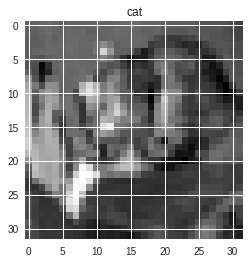

cat


In [35]:
# Mostrar uma imagem

import matplotlib.pyplot as plt
import numpy as np

image_index = 0
label = grayscale_dataset_test[image_index][1]
npimg = grayscale_dataset_test[image_index][0]

plt.imshow(npimg, cmap='gray')
plt.title(label)
plt.show()
print(label)

In [0]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
bias_in = 1 
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_img = np.append(linear_img, bias_in)
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')

for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_img = np.append(linear_img, bias_in)
    linear_dataset_test.append((linear_img,label))

    
for img, label in linear_dataset_train:
    img = np.append(img, bias_in)
    
np.random.shuffle(linear_dataset_train)
np.random.shuffle(linear_dataset_test)

In [37]:
size = len(linear_dataset_train[0][0])
print(size)

1025


# Definindo o perceptron

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
    o = np.dot(inputs, weights)
    y = sigmoid(o)
    return y

# Treinando o perceptron

In [0]:
def evaluate(weights,dataset):
    erro_total = 0
    for img,label in dataset:
        y = perceptron(img, weights)
        erro = abs(label-y)
        if(erro < 0.5):
            erro = 0
        else:
            erro = 1
        erro_total += erro
    return 100-erro_total*100/len(dataset)

In [0]:
# Inicialização
weights = (np.random.rand(1,size) - 0.5)[0]
neta = 0.000001
i = 0
# Implemente o treino aqui (para separar as duas classes definidas)
accuracies = []
for epoch in range(100):
    for img, label in linear_dataset_train[:30000]:
        y = perceptron(img, weights)
        error = label - y
        weights += error * neta * img * (1 - img)
    if(epoch == i):
        taxa = evaluate(weights, linear_dataset_train[30000:])
        accuracies.append(taxa)
        i += 10

In [41]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?
acerto = evaluate(weights, linear_dataset_test)
print("O acerto foi de {}%".format(acerto))

O acerto foi de 60.93%


10


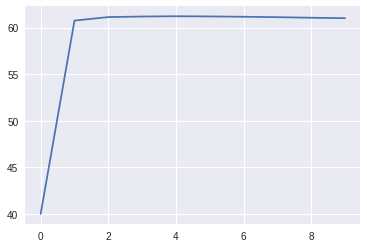

In [42]:
# Caso queiram plotar alguma coisa
#Acccuracies em cada 10 epochs de treinamento
import matplotlib.pyplot as plt
plt.plot(accuracies)
print(len(accuracies))

# Classificando classes individuais

Implemente aqui a modificação do processo de avaliação e treinamento para poder classificar cada classe individualmente.

- Ideia geral: treinar um perceptron por classe (exemplo positivo = exemplos da classe; exemplos negativos = exemplo de todas outras classes)
- Dado um exemplo qualquer, como decidir qual perceptron está dando a classe correta?

In [0]:
def def_dataset_train(grayscale_dataset_train, classe, bias):
    current_dataset_train = []
    for img, category in grayscale_dataset_train:
        linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
        if(category == classe):
            label = 1
        else:
            label = 0
        linear_img = np.append(linear_img, bias)
        current_dataset_train.append((linear_img,label))
    np.random.shuffle(current_dataset_train)
    return current_dataset_train

def def_dataset_test(grayscale_dataset_test, classe, bias):
    current_dataset_test = []
    for img, category in grayscale_dataset_test:
        linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
        if(category == classe):
            label = 1
        else:
            label = 0
        linear_img = np.append(linear_img, bias)
        current_dataset_test.append((linear_img,label))
    np.random.shuffle(current_dataset_test)
    return current_dataset_test

In [48]:
weights_vet = []
j = 0;
neta = 0.000001
for classe in classes:
    current_dataset_train = def_dataset_train(grayscale_dataset_train, classe, 1)
    current_dataset_test = def_dataset_test(grayscale_dataset_train, classe, 1)
    current_weights = (np.random.rand(1,size) - 0.5)[0]

    for epoch in range(100):
        for img, label in current_dataset_train[:30000]:
            y = perceptron(img, current_weights)
            error = label - y
            current_weights += error * neta * img * (1 - img)
        if((epoch%10)==0):
            print("a taxa na epoca {} para {} foi: {}%".format(epoch, classe, evaluate(current_weights, current_dataset_train[30000:])))

    acerto = evaluate(current_weights, current_dataset_test)
    print("O acerto foi de {}% para a classe {}".format(acerto, classe))
    weights_vet.append(current_weights)

a taxa na epoca 0 para plane foi: 10.340000000000003%
a taxa na epoca 10 para plane foi: 80.395%
a taxa na epoca 20 para plane foi: 83.785%
a taxa na epoca 30 para plane foi: 84.305%
a taxa na epoca 40 para plane foi: 84.465%
a taxa na epoca 50 para plane foi: 84.53999999999999%
a taxa na epoca 60 para plane foi: 84.535%
a taxa na epoca 70 para plane foi: 84.545%
a taxa na epoca 80 para plane foi: 84.565%
a taxa na epoca 90 para plane foi: 84.57%
O acerto foi de 84.672% para a classe plane
a taxa na epoca 0 para car foi: 13.799999999999997%
a taxa na epoca 10 para car foi: 86.51%
a taxa na epoca 20 para car foi: 87.59%
a taxa na epoca 30 para car foi: 87.73%
a taxa na epoca 40 para car foi: 87.755%
a taxa na epoca 50 para car foi: 87.755%
a taxa na epoca 60 para car foi: 87.77%
a taxa na epoca 70 para car foi: 87.785%
a taxa na epoca 80 para car foi: 87.785%
a taxa na epoca 90 para car foi: 87.8%
O acerto foi de 87.584% para a classe car
a taxa na epoca 0 para bird foi: 89.77%
a taxa n

In [0]:
def define_classe(indice):
    if indice == 0:
        return 'plane'
    if indice == 1:
        return 'car'
    if indice == 2:
        return 'bird'
    if indice == 3:
        return 'cat'
    if indice == 4:
        return 'deer'
    if indice == 5:
        return 'dog'
    if indice == 6:
        return 'frog'
    if indice == 7:
        return 'horse'
    if indice == 8:
        return 'ship'
    if indice == 9:
        return 'truck'

In [50]:
erro = 0
bias = 1
respostas = []
for img, label in grayscale_dataset_test: 
    outs = []
    img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    img = np.append(img, bias)
    for weight in weights_vet:
        y = perceptron(img, weight)
        outs.append(y)
    chute = outs.index(max(outs))
    classe = define_classe(chute)
    respostas.append(classe)
    if(classe != label):
        erro += 1
print("A taxa de acerto final foi de {}%".format(100-erro*100/10000))
    

A taxa de acerto final foi de 9.900000000000006%


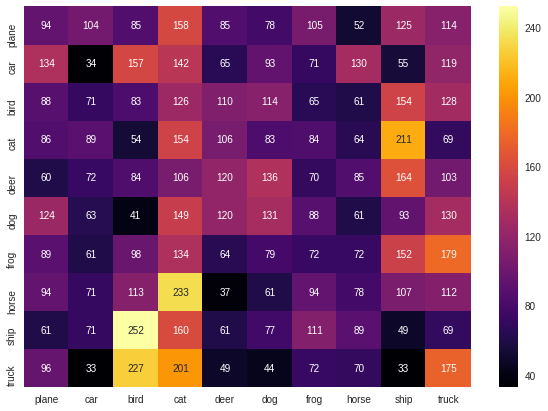

In [51]:
esperados = []
for img, label in grayscale_dataset_test:
    esperados.append(label)

array = confusion_matrix(esperados, respostas)
df_cm = pd.DataFrame(array, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot = True, cmap="inferno", fmt= "d")